# Ejercicio de Clusterización

En este notebook realizaremos un análisis completo de clusterización utilizando diferentes algoritmos de Machine Learning no supervisado.

## Objetivos:
- Cargar y explorar los datos
- Preprocesar los datos
- Aplicar diferentes algoritmos de clusterización
- Evaluar y comparar los resultados
- Visualizar los clusters obtenidos

## 1. Importación de Librerías

Importamos todas las librerías necesarias para el análisis de clusterización.

In [1]:
# Instalar plotly si no está instalado
%pip install plotly

# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Configuración de visualización
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Suprimir warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías importadas correctamente")

  Using cached plotly-6.2.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached narwhals-1.45.0-py3-none-any.whl.metadata (11 kB)
Using cached plotly-6.2.0-py3-none-any.whl (9.6 MB)
Using cached narwhals-1.45.0-py3-none-any.whl (371 kB)

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   -------------------- ------------------- 1/2 [plotly]

In [10]:
# Librerías de Machine Learning
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Para clustering jerárquico
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

print("✅ Librerías de ML importadas correctamente")

✅ Librerías de ML importadas correctamente


## 2. Carga y Exploración de Datos

Cargamos el dataset y realizamos una exploración inicial.

In [2]:
# Cargar los datos
# Puedes cambiar el nombre del archivo según el dataset que quieras usar
df = pd.read_csv("segmentation data.csv")

print(f"📊 Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")
print("\n🔍 Primeras 5 filas:")
df.head()

📊 Dataset cargado: 2000 filas y 8 columnas

🔍 Primeras 5 filas:


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
# Información general del dataset
print("📋 Información del dataset:")
df.info()

print("\n📈 Estadísticas descriptivas:")
df.describe()

📋 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB

📈 Estadísticas descriptivas:


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [4]:
# Verificar valores nulos
print("🔍 Valores nulos por columna:")
null_values = df.isnull().sum()
print(null_values[null_values > 0])

if null_values.sum() == 0:
    print("✅ No hay valores nulos en el dataset")

🔍 Valores nulos por columna:
Series([], dtype: int64)
✅ No hay valores nulos en el dataset


## 3. Análisis Exploratorio de Datos (EDA)

Visualizamos las distribuciones de las variables y sus relaciones.

In [5]:
# Seleccionar solo columnas numéricas para el análisis
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"📊 Columnas numéricas disponibles: {numeric_columns}")

# Crear subset con columnas numéricas
df_numeric = df[numeric_columns]
print(f"\n📏 Datos numéricos: {df_numeric.shape}")

📊 Columnas numéricas disponibles: ['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']

📏 Datos numéricos: (2000, 8)


In [ ]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('🔥 Matriz de Correlación entre Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

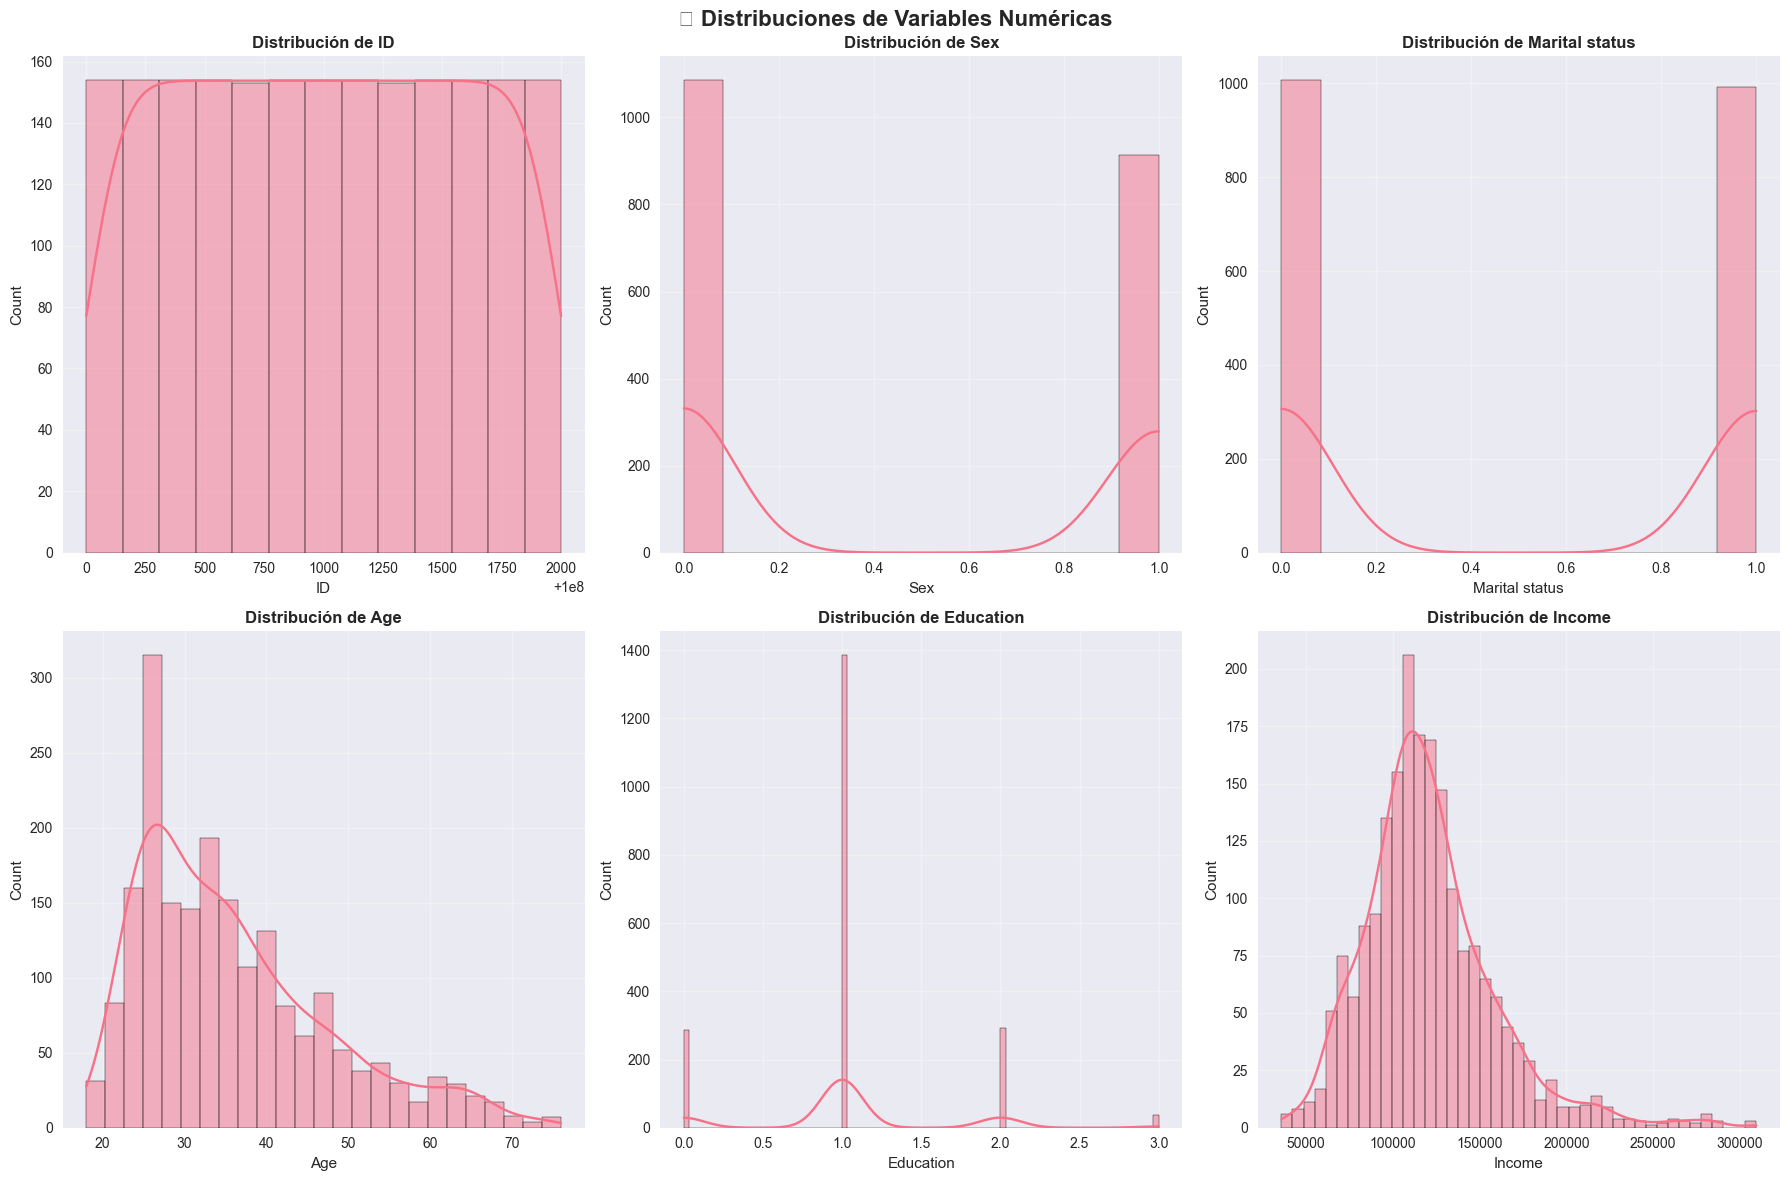

In [6]:
# Distribuciones de las variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, column in enumerate(numeric_columns[:6]):  # Mostrar máximo 6 variables
    if idx < len(axes):
        sns.histplot(data=df_numeric, x=column, kde=True, ax=axes[idx])
        axes[idx].set_title(f'Distribución de {column}', fontweight='bold')
        axes[idx].grid(True, alpha=0.3)

# Ocultar ejes no utilizados
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.suptitle('📊 Distribuciones de Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Preprocesamiento de Datos

Preparamos los datos para el análisis de clusterización.

In [7]:
# Preparar datos para clusterización
# Eliminar columnas no numéricas o identificadores si existen
X = df_numeric.copy()

print(f"📋 Datos preparados para clusterización: {X.shape}")
print(f"📊 Columnas seleccionadas: {list(X.columns)}")

# Guardar copia sin normalizar para comparaciones
X_original = X.copy()

X.head()

📋 Datos preparados para clusterización: (2000, 8)
📊 Columnas seleccionadas: ['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [11]:
# Normalización de datos
print("🔄 Aplicando normalización MinMax...")

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), 
                       columns=X.columns, 
                       index=X.index)

print("✅ Normalización completada")
print("\n📊 Estadísticas después de normalización:")
X_scaled.describe()

🔄 Aplicando normalización MinMax...
✅ Normalización completada

📊 Estadísticas después de normalización:


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.500000,0.457000,0.496500,0.308776,0.346000,0.311197,0.405250,0.369500
std,0.288892,0.498272,0.500113,0.202059,0.199927,0.139321,0.319294,0.406266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.155172,0.333333,0.226048,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.258621,0.333333,0.291434,0.500000,0.500000
75%,0.750000,1.000000,1.000000,0.413793,0.333333,0.373778,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Determinación del Número Óptimo de Clusters

Utilizamos el método del codo y métricas de evaluación para determinar el número óptimo de clusters.

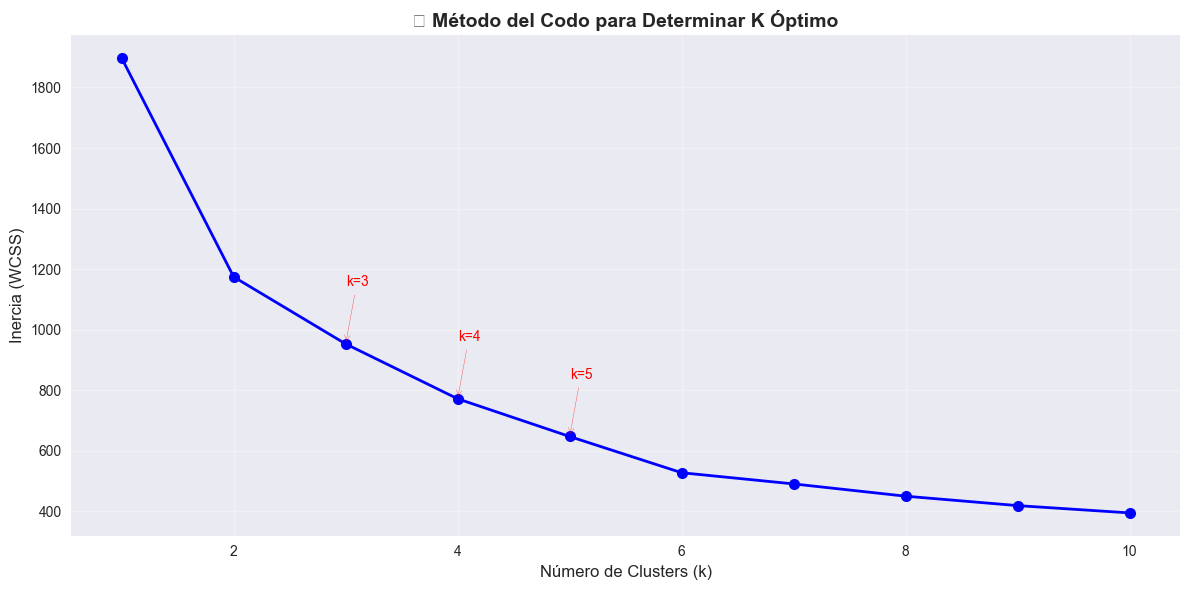

In [12]:
# Método del codo
def plot_elbow_method(X, max_k=10):
    """
    Grafica el método del codo para determinar el número óptimo de clusters
    """
    inertias = []
    k_range = range(1, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(12, 6))
    plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
    plt.title('📈 Método del Codo para Determinar K Óptimo', fontsize=14, fontweight='bold')
    plt.xlabel('Número de Clusters (k)', fontsize=12)
    plt.ylabel('Inercia (WCSS)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Destacar posibles codos
    for i in [3, 4, 5]:
        if i < len(inertias):
            plt.annotate(f'k={i}', 
                        xy=(i, inertias[i-1]), 
                        xytext=(i, inertias[i-1] + max(inertias)*0.1),
                        arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                        fontsize=10, color='red')
    
    plt.tight_layout()
    plt.show()
    
    return inertias

# Ejecutar método del codo
inertias = plot_elbow_method(X_scaled, max_k=10)

In [13]:
# Función para evaluar múltiples métricas
def evaluate_clustering_metrics(X, k_range=range(2, 11)):
    """
    Evalúa múltiples métricas de clusterización para diferentes valores de k
    """
    results = []
    
    for k in k_range:
        # KMeans
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        
        # Calcular métricas
        silhouette = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)
        davies = davies_bouldin_score(X, labels)
        
        results.append({
            'k': k,
            'Silhouette': silhouette,
            'Calinski-Harabasz': calinski,
            'Davies-Bouldin': davies
        })
    
    return pd.DataFrame(results)

# Evaluar métricas
metrics_df = evaluate_clustering_metrics(X_scaled, k_range=range(2, 11))
print("📊 Métricas de Evaluación de Clustering:")
print(metrics_df.round(4))

📊 Métricas de Evaluación de Clustering:
    k  Silhouette  Calinski-Harabasz  Davies-Bouldin
0   2      0.3608          1229.9208          1.2091
1   3      0.3198           989.6472          1.2602
2   4      0.3554           970.7795          1.1876
3   5      0.3672           963.8852          1.0950
4   6      0.3789          1036.3527          1.0656
5   7      0.3724           953.3166          1.1238
6   8      0.3476           915.9443          1.1991
7   9      0.3245           879.2123          1.2446
8  10      0.3243           842.2818          1.2473


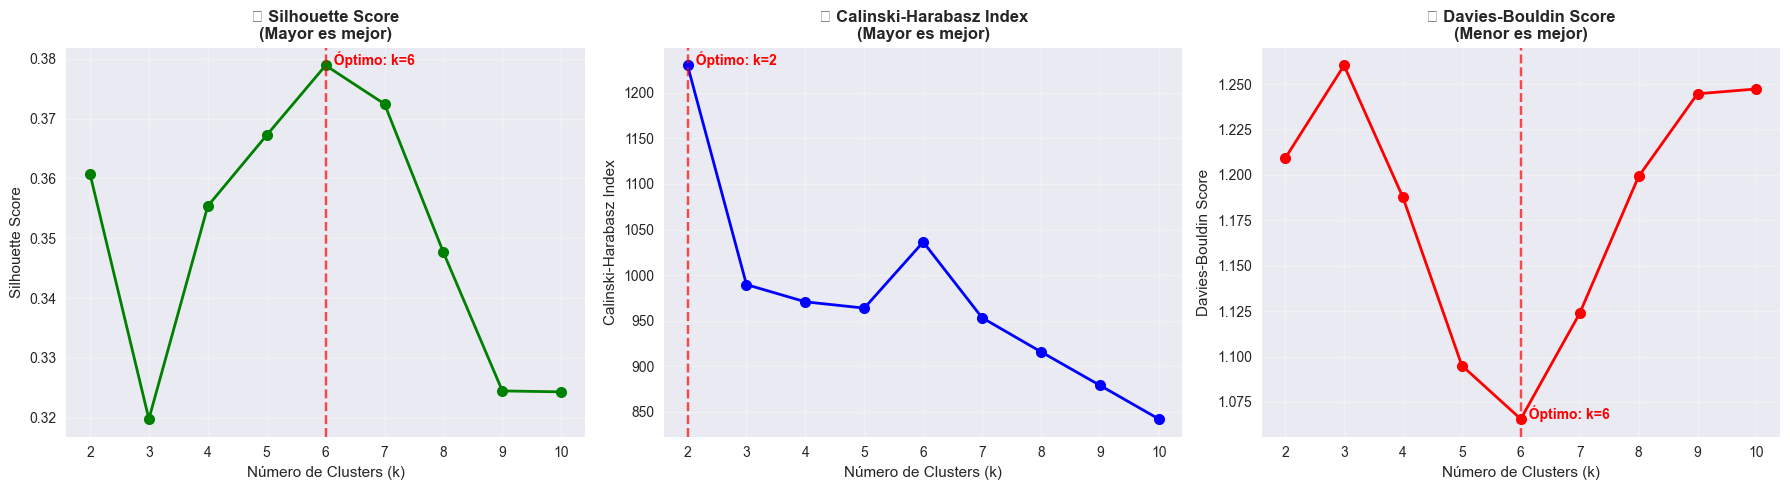


🎯 Recomendaciones de k óptimo:
   • Silhouette Score: k = 6
   • Calinski-Harabasz: k = 2
   • Davies-Bouldin: k = 6


In [14]:
# Visualizar métricas de evaluación
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score (mayor es mejor)
axes[0].plot(metrics_df['k'], metrics_df['Silhouette'], 'go-', linewidth=2, markersize=8)
axes[0].set_title('🎯 Silhouette Score\n(Mayor es mejor)', fontweight='bold')
axes[0].set_xlabel('Número de Clusters (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].grid(True, alpha=0.3)
best_sil = metrics_df.loc[metrics_df['Silhouette'].idxmax()]
axes[0].axvline(x=best_sil['k'], color='red', linestyle='--', alpha=0.7)
axes[0].text(best_sil['k'], best_sil['Silhouette'], f'  Óptimo: k={int(best_sil["k"])}', 
            color='red', fontweight='bold')

# Calinski-Harabasz Index (mayor es mejor)
axes[1].plot(metrics_df['k'], metrics_df['Calinski-Harabasz'], 'bo-', linewidth=2, markersize=8)
axes[1].set_title('📈 Calinski-Harabasz Index\n(Mayor es mejor)', fontweight='bold')
axes[1].set_xlabel('Número de Clusters (k)')
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].grid(True, alpha=0.3)
best_cal = metrics_df.loc[metrics_df['Calinski-Harabasz'].idxmax()]
axes[1].axvline(x=best_cal['k'], color='red', linestyle='--', alpha=0.7)
axes[1].text(best_cal['k'], best_cal['Calinski-Harabasz'], f'  Óptimo: k={int(best_cal["k"])}', 
            color='red', fontweight='bold')

# Davies-Bouldin Score (menor es mejor)
axes[2].plot(metrics_df['k'], metrics_df['Davies-Bouldin'], 'ro-', linewidth=2, markersize=8)
axes[2].set_title('📉 Davies-Bouldin Score\n(Menor es mejor)', fontweight='bold')
axes[2].set_xlabel('Número de Clusters (k)')
axes[2].set_ylabel('Davies-Bouldin Score')
axes[2].grid(True, alpha=0.3)
best_db = metrics_df.loc[metrics_df['Davies-Bouldin'].idxmin()]
axes[2].axvline(x=best_db['k'], color='red', linestyle='--', alpha=0.7)
axes[2].text(best_db['k'], best_db['Davies-Bouldin'], f'  Óptimo: k={int(best_db["k"])}', 
            color='red', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🎯 Recomendaciones de k óptimo:")
print(f"   • Silhouette Score: k = {int(best_sil['k'])}")
print(f"   • Calinski-Harabasz: k = {int(best_cal['k'])}")
print(f"   • Davies-Bouldin: k = {int(best_db['k'])}")

## 6. Aplicación de Algoritmos de Clusterización

Aplicamos diferentes algoritmos de clusterización y comparamos sus resultados.

In [16]:
# Definir número óptimo de clusters (puedes ajustar según los resultados anteriores)
optimal_k = 4  # Cambia este valor según tu análisis

print(f"🎯 Aplicando algoritmos de clusterización con k = {optimal_k}")

# Diccionario para almacenar resultados
clustering_results = {}
X_results = X_scaled.copy()

🎯 Aplicando algoritmos de clusterización con k = 4


In [17]:
# 1. K-Means
print("🔄 Aplicando K-Means...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
X_results['KMeans'] = kmeans.fit_predict(X_scaled)
clustering_results['KMeans'] = {
    'model': kmeans,
    'labels': X_results['KMeans'],
    'n_clusters': optimal_k
}
print(f"   ✅ K-Means completado. Clusters encontrados: {len(np.unique(X_results['KMeans']))}")

🔄 Aplicando K-Means...
   ✅ K-Means completado. Clusters encontrados: 4


In [22]:
# 2. Clustering Jerárquico (Aglomerativo)
print("🔄 Aplicando Clustering Jerárquico...")
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
X_results['Hierarchical'] = hierarchical.fit_predict(X_scaled)
clustering_results['Hierarchical'] = {
    'model': hierarchical,
    'labels': X_results['Hierarchical'],
    'n_clusters': optimal_k
}
print(f"   ✅ Clustering Jerárquico completado. Clusters encontrados: {len(np.unique(X_results['Hierarchical']))}")

🔄 Aplicando Clustering Jerárquico...
   ✅ Clustering Jerárquico completado. Clusters encontrados: 4


In [19]:
# 3. DBSCAN
print("🔄 Aplicando DBSCAN...")
# Estimar eps usando la distancia promedio
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
eps_estimate = np.mean(distances) * 1.5

dbscan = DBSCAN(eps=eps_estimate, min_samples=5)
X_results['DBSCAN'] = dbscan.fit_predict(X_scaled)
clustering_results['DBSCAN'] = {
    'model': dbscan,
    'labels': X_results['DBSCAN'],
    'n_clusters': len(np.unique(X_results['DBSCAN'][X_results['DBSCAN'] != -1]))
}
n_clusters_dbscan = len(np.unique(X_results['DBSCAN']))
n_noise = np.sum(X_results['DBSCAN'] == -1)
print(f"   ✅ DBSCAN completado. Clusters encontrados: {clustering_results['DBSCAN']['n_clusters']}, Puntos de ruido: {n_noise}")

🔄 Aplicando DBSCAN...
   ✅ DBSCAN completado. Clusters encontrados: 53, Puntos de ruido: 698


In [23]:
# 4. Mean Shift
print("🔄 Aplicando Mean Shift...")
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)
mean_shift = MeanShift(bandwidth=bandwidth)
X_results['MeanShift'] = mean_shift.fit_predict(X_scaled)
clustering_results['MeanShift'] = {
    'model': mean_shift,
    'labels': X_results['MeanShift'],
    'n_clusters': len(np.unique(X_results['MeanShift']))
}
print(f"   ✅ Mean Shift completado. Clusters encontrados: {clustering_results['MeanShift']['n_clusters']}")

print("\n🎉 Todos los algoritmos de clusterización aplicados exitosamente!")

🔄 Aplicando Mean Shift...
   ✅ Mean Shift completado. Clusters encontrados: 4

🎉 Todos los algoritmos de clusterización aplicados exitosamente!
   ✅ Mean Shift completado. Clusters encontrados: 4

🎉 Todos los algoritmos de clusterización aplicados exitosamente!


## 7. Evaluación y Comparación de Resultados

Evaluamos y comparamos el rendimiento de los diferentes algoritmos.

In [21]:
# Evaluar métricas para cada algoritmo
evaluation_results = []

for algo_name, result in clustering_results.items():
    labels = result['labels']
    
    # Excluir puntos de ruido para DBSCAN
    if algo_name == 'DBSCAN' and -1 in labels:
        mask = labels != -1
        X_eval = X_scaled[mask]
        labels_eval = labels[mask]
    else:
        X_eval = X_scaled
        labels_eval = labels
    
    # Calcular métricas solo si hay más de 1 cluster
    if len(np.unique(labels_eval)) > 1:
        silhouette = silhouette_score(X_eval, labels_eval)
        calinski = calinski_harabasz_score(X_eval, labels_eval)
        davies = davies_bouldin_score(X_eval, labels_eval)
    else:
        silhouette = calinski = davies = np.nan
    
    evaluation_results.append({
        'Algoritmo': algo_name,
        'N_Clusters': result['n_clusters'],
        'Silhouette': silhouette,
        'Calinski-Harabasz': calinski,
        'Davies-Bouldin': davies
    })

# Crear DataFrame con resultados
evaluation_df = pd.DataFrame(evaluation_results)
print("📊 Comparación de Algoritmos de Clusterización:")
print(evaluation_df.round(4))

📊 Comparación de Algoritmos de Clusterización:
      Algoritmo  N_Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0        KMeans           4      0.3554           970.7795          1.1876
1  Hierarchical           4      0.3553           967.0230          1.1927
2        DBSCAN          53      0.0935            61.6611          1.1549
3     MeanShift           4      0.3540           908.6000          1.1346


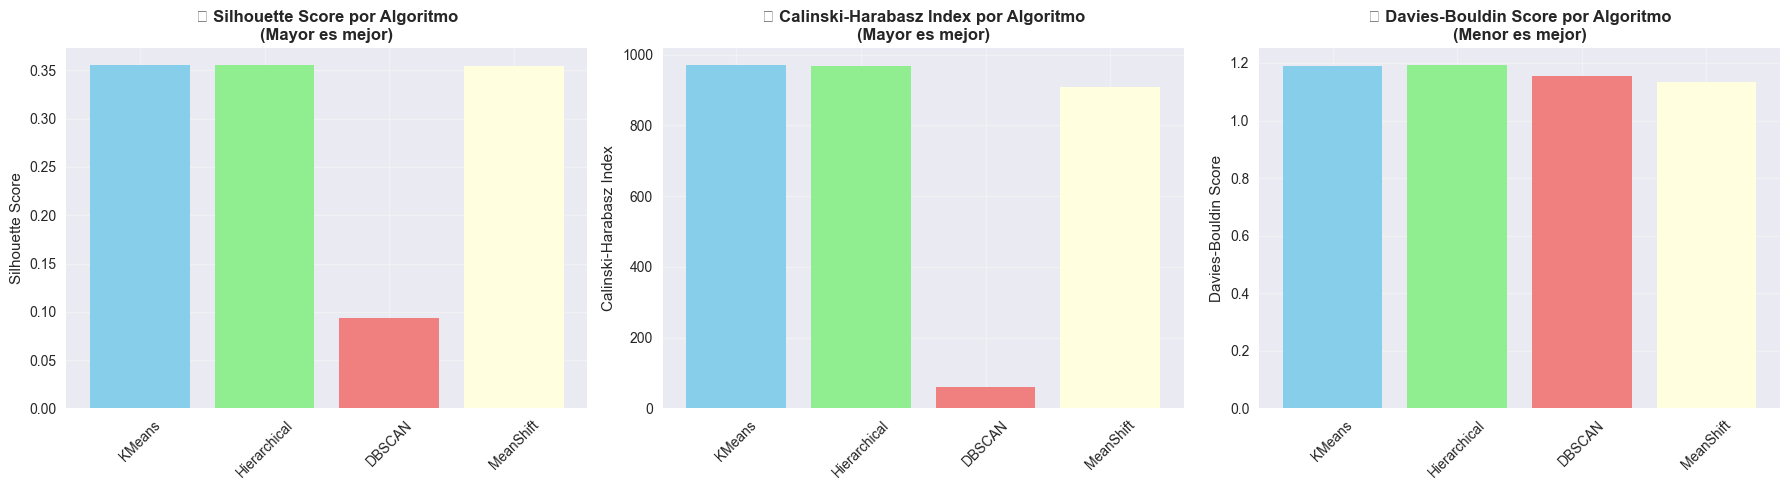


🏆 Mejores algoritmos por métrica:
   • Silhouette Score: KMeans
   • Calinski-Harabasz: KMeans
   • Davies-Bouldin: MeanShift


In [25]:
# Visualizar comparación de métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

algorithms = evaluation_df['Algoritmo']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow']

# Silhouette Score
axes[0].bar(algorithms, evaluation_df['Silhouette'], color=colors)
axes[0].set_title('🎯 Silhouette Score por Algoritmo\n(Mayor es mejor)', fontweight='bold')
axes[0].set_ylabel('Silhouette Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Calinski-Harabasz Index
axes[1].bar(algorithms, evaluation_df['Calinski-Harabasz'], color=colors)
axes[1].set_title('📈 Calinski-Harabasz Index por Algoritmo\n(Mayor es mejor)', fontweight='bold')
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# Davies-Bouldin Score
axes[2].bar(algorithms, evaluation_df['Davies-Bouldin'], color=colors)
axes[2].set_title('📉 Davies-Bouldin Score por Algoritmo\n(Menor es mejor)', fontweight='bold')
axes[2].set_ylabel('Davies-Bouldin Score')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identificar el mejor algoritmo por métrica
best_silhouette = evaluation_df.loc[evaluation_df['Silhouette'].idxmax(), 'Algoritmo']
best_calinski = evaluation_df.loc[evaluation_df['Calinski-Harabasz'].idxmax(), 'Algoritmo']
best_davies = evaluation_df.loc[evaluation_df['Davies-Bouldin'].idxmin(), 'Algoritmo']

print(f"\n🏆 Mejores algoritmos por métrica:")
print(f"   • Silhouette Score: {best_silhouette}")
print(f"   • Calinski-Harabasz: {best_calinski}")
print(f"   • Davies-Bouldin: {best_davies}")

## 8. Visualización de Clusters

Visualizamos los clusters obtenidos por cada algoritmo.

In [26]:
# Aplicar PCA para visualización en 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"📊 PCA aplicado. Varianza explicada: {pca.explained_variance_ratio_.sum():.2%}")
print(f"   • PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"   • PC2: {pca.explained_variance_ratio_[1]:.2%}")

📊 PCA aplicado. Varianza explicada: 68.98%
   • PC1: 45.08%
   • PC2: 23.90%


In [ ]:
# Visualizar clusters en 2D
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

algorithms = ['KMeans', 'Hierarchical', 'DBSCAN', 'MeanShift']
colors = ['viridis', 'plasma', 'coolwarm', 'spring']

for idx, algo in enumerate(algorithms):
    labels = X_results[algo]
    n_clusters = len(np.unique(labels))
    
    # Crear scatter plot
    scatter = axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], 
                              c=labels, cmap=colors[idx], 
                              alpha=0.7, s=50)
    
    axes[idx].set_title(f'🎨 {algo}\n({n_clusters} clusters)', 
                       fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Primera Componente Principal', fontsize=12)
    axes[idx].set_ylabel('Segunda Componente Principal', fontsize=12)
    axes[idx].grid(True, alpha=0.3)
    
    # Agregar colorbar
    plt.colorbar(scatter, ax=axes[idx], label='Cluster')

plt.suptitle('🔍 Visualización de Clusters por Algoritmo (PCA 2D)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

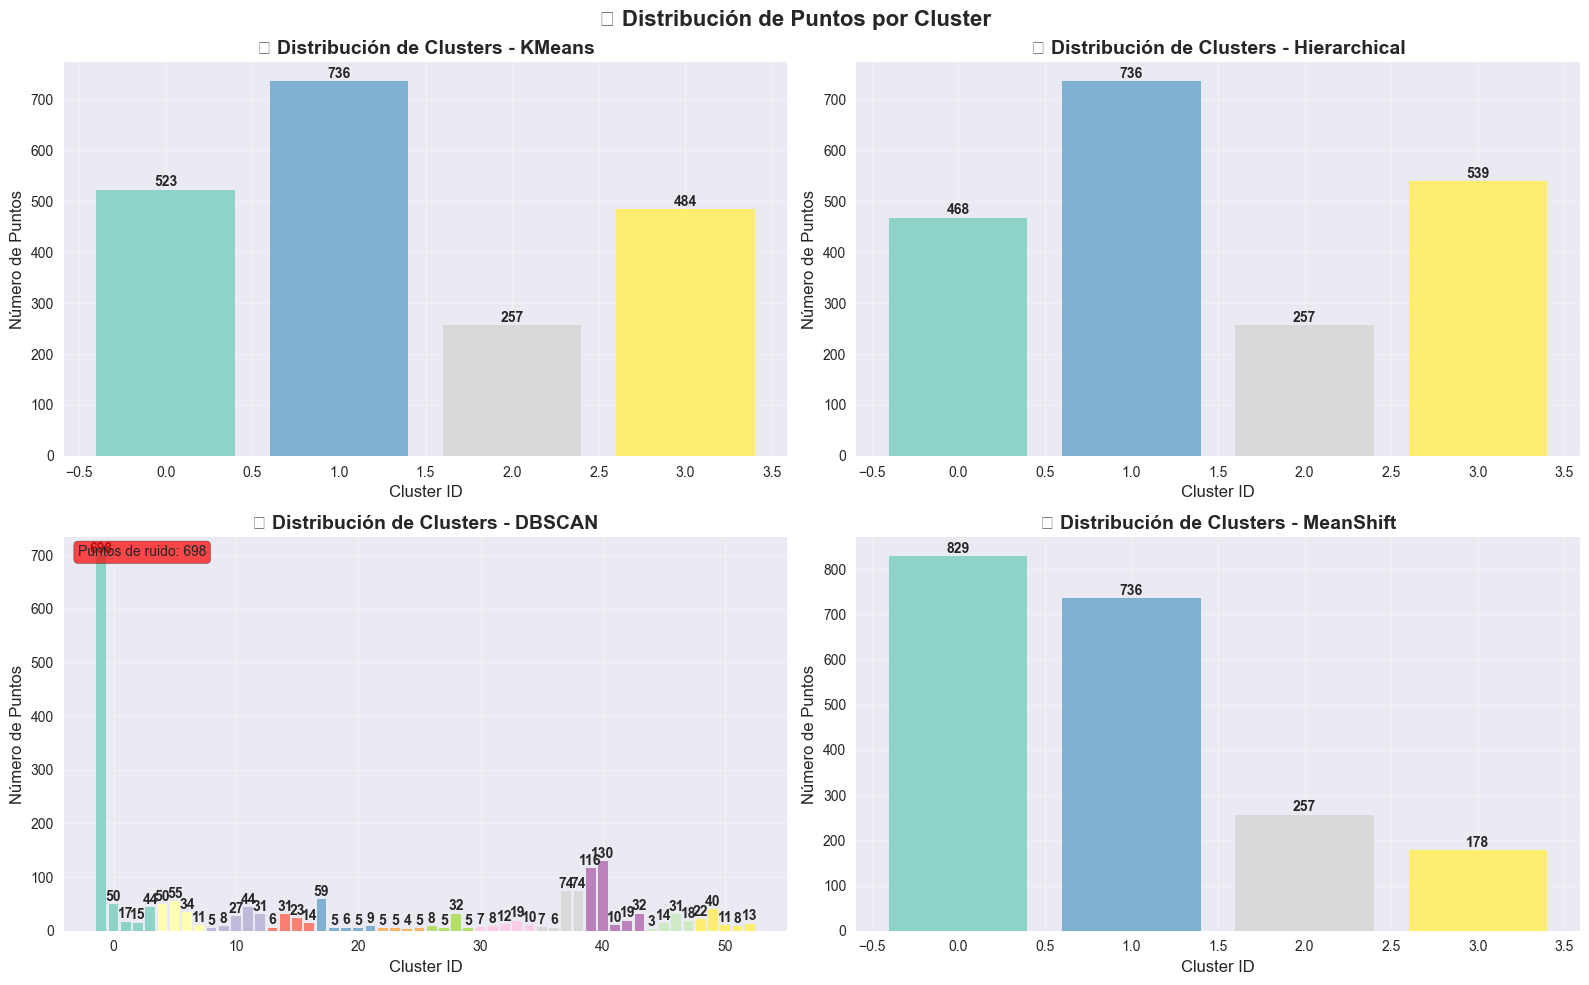

In [27]:
# Análisis de la distribución de clusters
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, algo in enumerate(algorithms):
    labels = X_results[algo]
    unique_labels, counts = np.unique(labels, return_counts=True)
    
    # Crear gráfico de barras
    bars = axes[idx].bar(unique_labels, counts, 
                        color=plt.cm.Set3(np.linspace(0, 1, len(unique_labels))))
    
    axes[idx].set_title(f'📊 Distribución de Clusters - {algo}', 
                       fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Cluster ID', fontsize=12)
    axes[idx].set_ylabel('Número de Puntos', fontsize=12)
    axes[idx].grid(True, alpha=0.3)
    
    # Agregar etiquetas en las barras
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                      f'{count}', ha='center', va='bottom', fontweight='bold')
    
    # Mostrar estadísticas
    if algo == 'DBSCAN' and -1 in unique_labels:
        noise_points = counts[unique_labels == -1][0] if -1 in unique_labels else 0
        axes[idx].text(0.02, 0.98, f'Puntos de ruido: {noise_points}', 
                      transform=axes[idx].transAxes, 
                      fontsize=10, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='red', alpha=0.7))

plt.suptitle('📈 Distribución de Puntos por Cluster', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Análisis de Clusters por Variables Originales

Analizamos cómo se comportan los clusters en las variables originales.

In [28]:
# Seleccionar el mejor algoritmo (puedes cambiar según tus resultados)
best_algorithm = 'KMeans'  # Cambia esto según tu análisis
best_labels = X_results[best_algorithm]

print(f"🎯 Analizando clusters del algoritmo: {best_algorithm}")

# Crear DataFrame con datos originales y etiquetas de cluster
analysis_df = X_original.copy()
analysis_df['Cluster'] = best_labels

# Estadísticas por cluster
cluster_stats = analysis_df.groupby('Cluster').agg(['mean', 'std', 'count']).round(2)
print("\n📊 Estadísticas por Cluster:")
print(cluster_stats)

🎯 Analizando clusters del algoritmo: KMeans

📊 Estadísticas por Cluster:
                   ID                 Sex             Marital status       \
                 mean     std count  mean   std count           mean  std   
Cluster                                                                     
0        1.000007e+08  403.02   523  0.00  0.04   523            0.0  0.0   
1        1.000011e+08  577.63   736  1.00  0.00   736            1.0  0.0   
2        1.000009e+08  506.08   257  0.00  0.00   257            1.0  0.0   
3        1.000013e+08  607.00   484  0.37  0.48   484            0.0  0.0   

                 Age  ... Education     Income                 Occupation  \
        count   mean  ...     count       mean       std count       mean   
Cluster               ...                                                   
0         523  39.99  ...       523  145319.27  38140.32   523       1.27   
1         736  33.19  ...       736  116442.17  35759.97   736       0.74   
2 

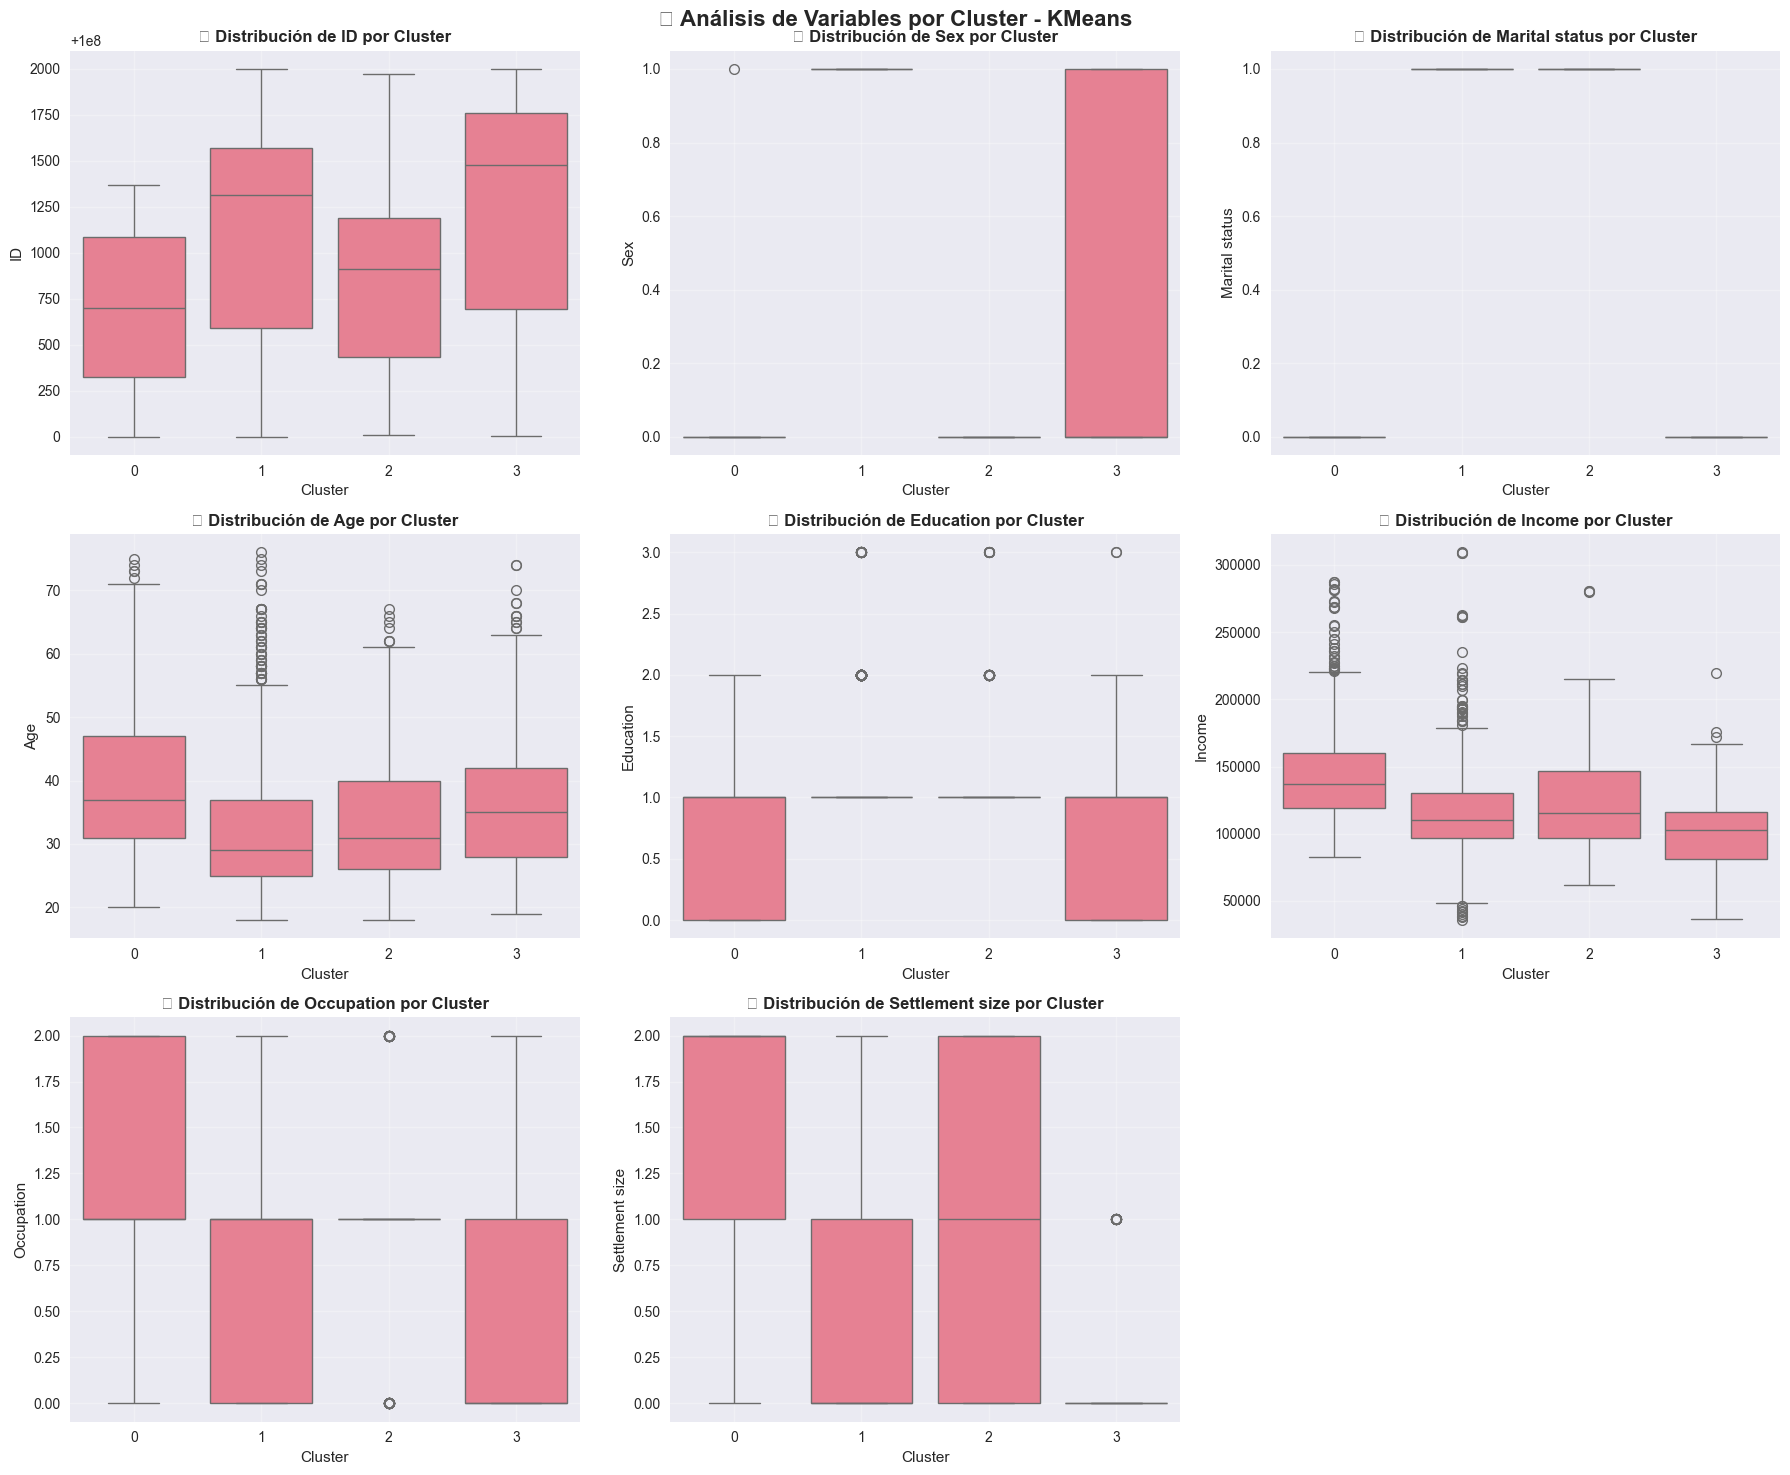

In [29]:
# Crear gráficos de caja por cluster para cada variable
n_vars = len(numeric_columns)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.ravel()

for idx, column in enumerate(numeric_columns):
    if idx < len(axes):
        sns.boxplot(data=analysis_df, x='Cluster', y=column, ax=axes[idx])
        axes[idx].set_title(f'📦 Distribución de {column} por Cluster', 
                          fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)

# Ocultar ejes no utilizados
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.suptitle(f'📊 Análisis de Variables por Cluster - {best_algorithm}', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 10. Interpretación y Conclusiones

Interpretamos los resultados y extraemos conclusiones del análisis de clusterización.

In [30]:
# Crear perfiles de clusters
def create_cluster_profiles(df, cluster_col='Cluster'):
    """
    Crear perfiles descriptivos de cada cluster
    """
    profiles = []
    
    for cluster_id in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster_id]
        
        profile = {
            'Cluster': cluster_id,
            'Tamaño': len(cluster_data),
            'Porcentaje': f"{len(cluster_data)/len(df)*100:.1f}%"
        }
        
        # Calcular características promedio
        for col in numeric_columns:
            if col in cluster_data.columns:
                profile[f'{col}_media'] = cluster_data[col].mean()
        
        profiles.append(profile)
    
    return pd.DataFrame(profiles)

# Crear perfiles
cluster_profiles = create_cluster_profiles(analysis_df)
print("🎭 Perfiles de Clusters:")
print(cluster_profiles.round(2))

🎭 Perfiles de Clusters:
   Cluster  Tamaño Porcentaje      ID_media  Sex_media  Marital status_media  \
0        0     523      26.2%  1.000007e+08       0.00                   0.0   
1        1     736      36.8%  1.000011e+08       1.00                   1.0   
2        2     257      12.8%  1.000009e+08       0.00                   1.0   
3        3     484      24.2%  1.000013e+08       0.37                   0.0   

   Age_media  Education_media  Income_media  Occupation_media  \
0      39.99             0.82     145319.27              1.27   
1      33.19             1.26     116442.17              0.74   
2      33.97             1.27     122976.72              0.93   
3      36.66             0.81     100414.07              0.35   

   Settlement size_media  
0                   1.52  
1                   0.57  
2                   0.92  
3                   0.06  


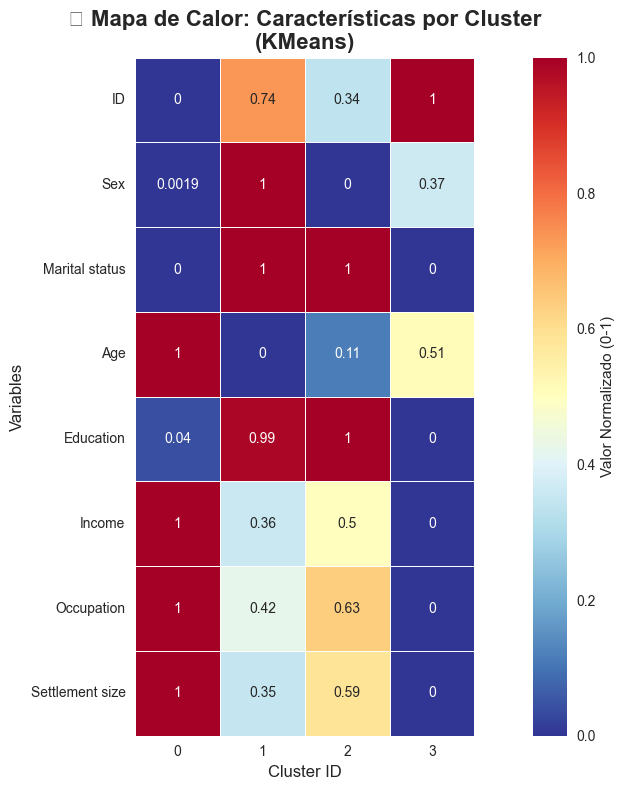

In [31]:
# Mapa de calor de características por cluster
# Normalizar los datos para visualización
cluster_means = analysis_df.groupby('Cluster')[numeric_columns].mean()
cluster_means_norm = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means_norm.T, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0.5,
            square=True, 
            linewidths=0.5,
            cbar_kws={'label': 'Valor Normalizado (0-1)'})

plt.title(f'🔥 Mapa de Calor: Características por Cluster\n({best_algorithm})', 
          fontsize=16, fontweight='bold')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.tight_layout()
plt.show()

## 📝 Conclusiones del Análisis

Basándote en los resultados obtenidos, completa las siguientes observaciones:

### 🎯 Resultados Principales:

1. **Número óptimo de clusters**: _[Completa según tus resultados]_

2. **Mejor algoritmo**: _[Completa según las métricas]_

3. **Características de los clusters**:
   - **Cluster 0**: _[Describe las características principales]_
   - **Cluster 1**: _[Describe las características principales]_
   - **Cluster 2**: _[Describe las características principales]_
   - **Cluster 3**: _[Describe las características principales]_

### 📊 Insights del Negocio:

1. _[Agrega insights relevantes para el negocio]_
2. _[Patrones interesantes encontrados]_
3. _[Recomendaciones basadas en los clusters]_

### 🔄 Próximos Pasos:

1. _[Validación con expertos del dominio]_
2. _[Estrategias específicas por cluster]_
3. _[Monitoreo y actualización del modelo]_

In [32]:
# Guardar resultados
print("💾 Guardando resultados...")

# Guardar dataset con etiquetas de cluster
analysis_df.to_csv('resultados_clusterizacion.csv', index=False)
print("   ✅ Dataset con clusters guardado: 'resultados_clusterizacion.csv'")

# Guardar métricas de evaluación
evaluation_df.to_csv('metricas_evaluacion.csv', index=False)
print("   ✅ Métricas de evaluación guardadas: 'metricas_evaluacion.csv'")

# Guardar perfiles de clusters
cluster_profiles.to_csv('perfiles_clusters.csv', index=False)
print("   ✅ Perfiles de clusters guardados: 'perfiles_clusters.csv'")

print("\n🎉 ¡Análisis de clusterización completado exitosamente!")
print("📁 Revisa los archivos generados para más detalles.")

💾 Guardando resultados...
   ✅ Dataset con clusters guardado: 'resultados_clusterizacion.csv'
   ✅ Métricas de evaluación guardadas: 'metricas_evaluacion.csv'
   ✅ Perfiles de clusters guardados: 'perfiles_clusters.csv'

🎉 ¡Análisis de clusterización completado exitosamente!
📁 Revisa los archivos generados para más detalles.
